<a href="https://colab.research.google.com/github/Natali82-03/AI_21MM/blob/main/lab2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2

## Задание
Решите пожалуйста следующую задачу.

Используйте классификатор SVM для данных находящихся пo
[ссылке](https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view?usp=share_link) (данный датасет применялся в лабораторной работе №1). Здесь - выходящей меткой (учителем) является столбец / атрибут - `outcome`. Предоставьте результаты, используя следующие ядерные функции:
- Линейное ядро
- Полиномиальное ядро
- Гауссово ядро
- Сигмоидное ядро

**Укажите `score` моделей.**

## Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! gdown --fuzzy 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view?usp=share_link'

Downloading...
From: https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 53.1MB/s]


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##  О датасете
[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)

Этот набор данных взят из Национального института диабета, заболеваний органов пищеварения и почек (NIDDK). Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года, родом из индейцев Пима.

Наборы данных состоят из нескольких переменных медицинских предикторов и одной целевой переменной `Outcome`. Переменные-предикторы включают количество беременностей, которые были у пациентки, её индекс массы тела `BMI`, уровень инсулина, возраст и так далее. Всего в датасете 9 переменных:
- `Pregnancies` - количество беременностей;
- `Glucose` - концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе;
- `BloodPressure` - диастолическое артериальное давление (мм рт. ст.);
- `SkinThickness` - толщина кожной складки трицепса (мм);
- `Insulin` - 2-часовой сывороточный инсулин (мкЕд/мл);
- `BMI` - Индекс массы тела (вес в кг/(рост в м)^2);
- `DiabetesPedigreeFunction` - функция оценки вероятности диабета на основе семейного анамнеза;
- `Age` - возраст (лет);
- `Outcome` - целевая переменная (0 или 1) 268 из 768 — 1 (больны), остальные — 0 (здоровы).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Классификатор SVM

Создается с использованием SVC из библиотеки scikit-learn. Базовая структура включает загрузку данных, разделение на тренировочную и тестовую выборки.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка или создание данных
X, y = make_classification(n_samples=300, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (240, 20)
Размер тестовой выборки: (60, 20)


### Масштабирование данных

Используется StandardScaler, который нормализует признаки путем вычитания среднего значения и деления на стандартное отклонение. Это критически важно для SVM, так как алгоритм чувствителен к масштабу данных.

In [ ]:
# Создание объекта StandardScaler для масштабирования
scaler = StandardScaler()

# Обучение на тренировочных данных и трансформация
X_train_scaled = scaler.fit_transform(X_train)

# Трансформация тестовых данных используя параметры из тренировочных
X_test_scaled = scaler.transform(X_test)

print("Среднее значение после масштабирования (должно быть близко к 0):")
print("X_train_scaled mean:", X_train_scaled.mean(axis=0).mean())
print("X_train_scaled std:", X_train_scaled.std(axis=0).mean())


Среднее значение после масштабирования (должно быть близко к 0):
X_train_scaled mean: -1.3087404424072523e-17
X_train_scaled std: 1.0


### Линейное ядро

Используется для линейно разделимых данных. Самое быстрое и интерпретируемое ядро.

Линейное ядро — это просто прямая граница между классами. Алгоритм ищет такую линию или гиперплоскость, которая лучше всего разделяет классы.

 Обычно даёт хорошие показатели на простых, линейных данных. Если данные запутанные, а классы нелинейно переплетены, точность падает.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



Линейное ядро (Linear Kernel)
Точность (Accuracy): 0.7167

Отчет классификации:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        30
           1       0.76      0.63      0.69        30

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.71        60
weighted avg       0.72      0.72      0.71        60

Матрица ошибок:
[[24  6]
 [11 19]]


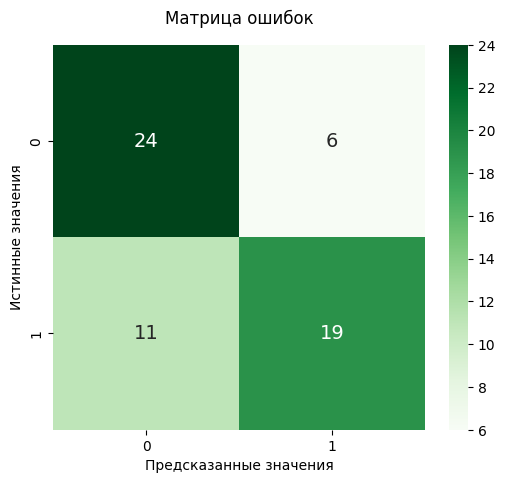

In [ ]:
# Создание и обучение SVM с линейным ядром
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_linear = svm_linear.predict(X_test_scaled)

# Оценка производительности
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("=" * 50)
print("Линейное ядро (Linear Kernel)")
print("=" * 50)
print(f"Точность (Accuracy): {accuracy_linear:.4f}")
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred_linear))

# y_true — истинные метки, y_pred — предсказанные
cm = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

### Полиномиальное ядро

Полиномиальное ядро (Polynomial): Создает нелинейные границы решений. Параметр degree определяет степень полинома.

degree -  степень полинома.

 Это ядро строит границу, которая есть полиномом определённой степени. Чем выше степень, тем сложнее форма границы.

Хорошо работает, если классы разделены какой-то сложной кривой (например, окружность, парабола и т.д.).

 Может помочь улучшить точность на "закрученных" данных, но иногда приводит к переобучению (особенно при большой степени - большая степень обычно плохая идея!).

Полиномиальное ядро (Polynomial Kernel, degree=3)
Точность (Accuracy): 0.8667

Отчет классификации:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.87      0.87      0.87        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



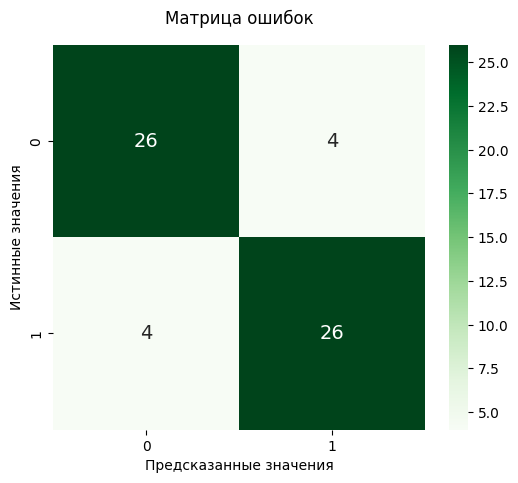

In [ ]:
# Создание и обучение SVM с полиномиальным ядром
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_poly = svm_poly.predict(X_test_scaled)

# Оценка производительности
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("=" * 50)
print("Полиномиальное ядро (Polynomial Kernel, degree=3)")
print("=" * 50)
print(f"Точность (Accuracy): {accuracy_poly:.4f}")
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred_poly))

# y_true — истинные метки, y_pred — предсказанные
cm = confusion_matrix(y_test, y_pred_poly)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()


### Гауссово ядро

Гауссово ядро (RBF): Радиальная функция базиса. Универсальное ядро для большинства задач, создает гладкие нелинейные границы.

gamma  определяет радиус влияния одного примера.

Это ядро строит очень гибкую и гладкую границу, которая может окружать отдельные точки. По сути, оно "размазывает" влияние каждого примера вокруг себя.

Хорошо работает, когда граница между классами очень сложная, а данные могут быть не только нелинейно разделены, но и "разбросаны пятнами".

Часто даёт лучшие результаты на реальных задачах, особенно когда данные сложные и плохо разделяются с помощью прямых или простых кривых.

Гауссово ядро (RBF Kernel)
Точность (Accuracy): 0.9333

Отчет классификации:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.96      0.90      0.93        30

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



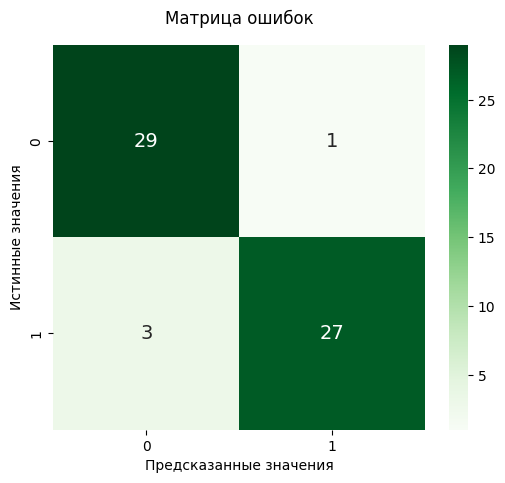

In [ ]:
# Создание и обучение SVM с гауссовым ядром (RBF)
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Оценка производительности
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("=" * 50)
print("Гауссово ядро (RBF Kernel)")
print("=" * 50)
print(f"Точность (Accuracy): {accuracy_rbf:.4f}")
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred_rbf))

cm = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()


### Сигмоидное ядро

Сигмоидное ядро (Sigmoid): Похоже на нейронные сети. Менее популярно, но может быть полезным в некоторых случаях.

Похоже на функцию активации в нейронных сетях. Граница решений напоминает поведение одного слоя нейросети.

Иногда помогает при особых типах данных, но редко превосходит RBF и полиномиальные ядра.



Сигмоидное ядро (Sigmoid Kernel)
Точность (Accuracy): 0.7500

Отчет классификации:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        30
           1       0.78      0.70      0.74        30

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



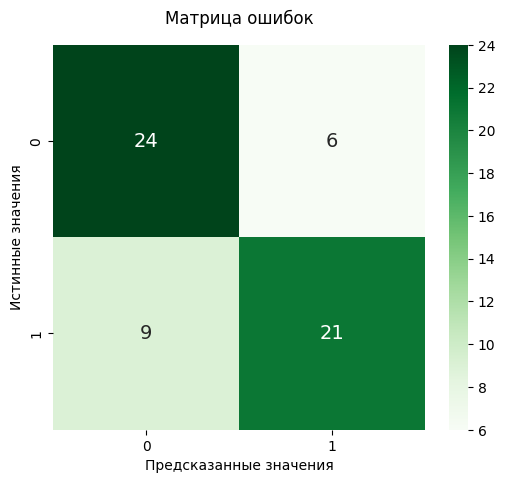

In [ ]:
# Создание и обучение SVM с сигмоидным ядром
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)
svm_sigmoid.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_sigmoid = svm_sigmoid.predict(X_test_scaled)

# Оценка производительности
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print("=" * 50)
print("Сигмоидное ядро (Sigmoid Kernel)")
print("=" * 50)
print(f"Точность (Accuracy): {accuracy_sigmoid:.4f}")
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred_sigmoid))

cm = confusion_matrix(y_test, y_pred_sigmoid)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

# Сравнение всех ядер.


СРАВНЕНИЕ ВСЕХ ЯДЕР
          Ядро  Точность
      Линейное  0.716667
Полиномиальное  0.866667
Гауссово (RBF)  0.933333
    Сигмоидное  0.750000


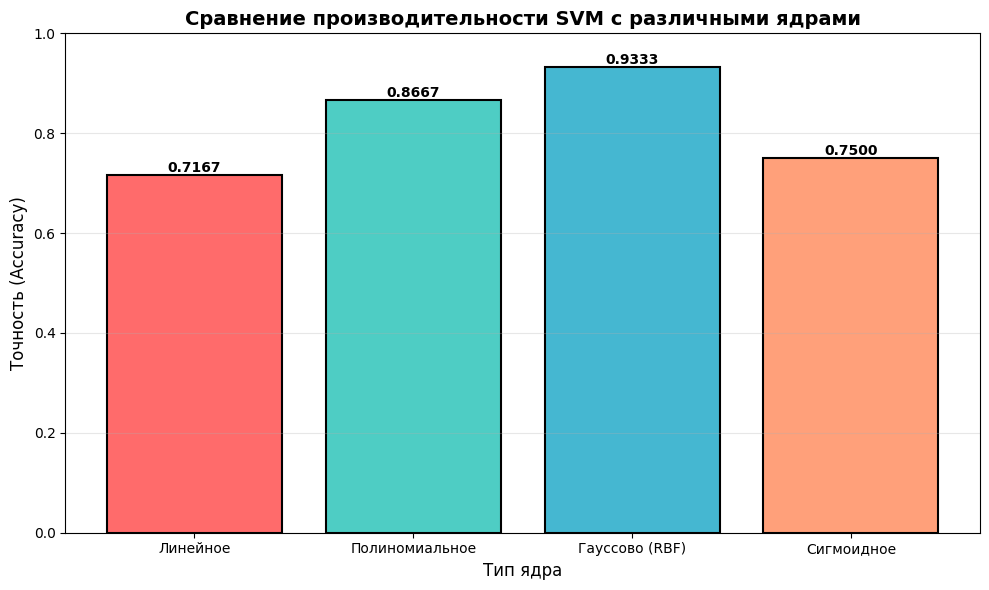

In [ ]:
# Создание сводной таблицы результатов
results = {
    'Ядро': ['Линейное', 'Полиномиальное', 'Гауссово (RBF)', 'Сигмоидное'],
    'Точность': [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid]
}

results_df = pd.DataFrame(results)
print("\n" + "=" * 50)
print("СРАВНЕНИЕ ВСЕХ ЯДЕР")
print("=" * 50)
print(results_df.to_string(index=False))

# Визуализация результатов
plt.figure(figsize=(10, 6))
kernels = results_df['Ядро']
accuracies = results_df['Точность']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

bars = plt.bar(kernels, accuracies, color=colors, edgecolor='black', linewidth=1.5)
plt.ylabel('Точность (Accuracy)', fontsize=12)
plt.xlabel('Тип ядра', fontsize=12)
plt.title('Сравнение производительности SVM с различными ядрами', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Добавление значений на столбцы
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
